A <font color='blue'> **Support Vector Machine (SVM)** </font> is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.

### Linear SVM Classification



In [ ]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### Large margin classification

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # petal length, petal width
y = iris['target']
print(X.shape,"--",y.shape,"--")

(150, 2) -- (150,) --


In [ ]:
X[5] , y[5],set(y)

(array([1.7, 0.4]), 0, {0, 1, 2})

In [ ]:
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

print(X.shape,"--",y.shape)

## SVM classifier model 
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X,y)

(100, 2) -- (100,)


SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

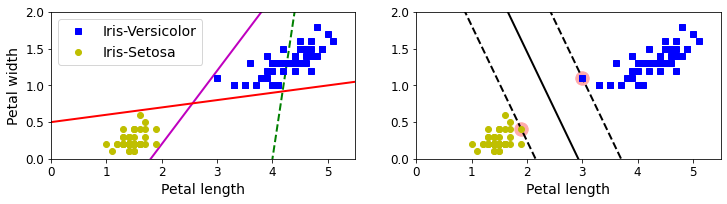

In [ ]:
x0 = np.linspace(0,5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0- 1.8
pred_3 = 0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  #At the decision boundary, w0*x0 + w1*x1 + b = 0
  # => x1 = -w0/w1 * x0 - b/w1
  x0 =np.linspace(xmin, xmax, 200) ## create 200 data points between xmin and xmax
  decision_boundary = -w[0]/w[1]*x0 - b/w[1]

  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  svs = svm_clf.support_vectors_
  plt.scatter(svs[:,0], svs[:,1], s=180, facecolors='#FFAAAA')
  plt.plot(x0, decision_boundary, "k-", linewidth=2)
  plt.plot(x0, gutter_up, "k--", linewidth=2)
  plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))
plt.subplot(121) # creates a subplot
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris-Versicolor" )
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2]) ## setting the x axis from 0 to 5.5 and y from 0 to 2 

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

- The left plot shows the decision boundaries of three possible linear classifiers. 
- The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. 
- The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances

- The solid line in the plot on the right represents the decision boundary of an **SVM classifier**; this line not only separates the two classes but also stays as far away from the closest training instances as possible.
- SVM classifier can be thought of as fitting the widest possible street (represented by the parallel dashed lines) between the classes.  <font color ='green'> This is called large margin classification</font>

- Adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the <font color='brown'>support vectors </font>


#### Sensitivity to feature scales

SVMs are sensitive to the feature scales 

Below is an example

In [ ]:

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
[Xs,ys]

[array([[ 1., 50.],
        [ 5., 20.],
        [ 3., 80.],
        [ 5., 60.]]), array([0, 0, 1, 1])]

(-2.0, 2.0, -2.0, 2.0)

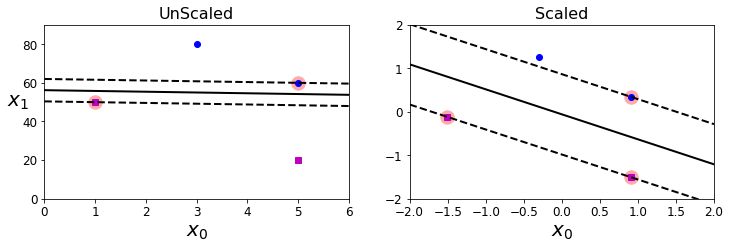

In [ ]:
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs,ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:,1][ys==1], "bo") ## get Xs 1st & 2nd col where ys=1
plt.plot(Xs[:, 0][ys==0], Xs[:,1][ys==0], "ms") ## get Xs 1st & 2nd col where ys=0
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("UnScaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:,1][ys==1], "bo") ## get X_scaled 1st & 2nd col where ys=1
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:,1][ys==0], "ms") ## get X_scaled 1st & 2nd col where ys=0
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2,2,-2,2])

In left the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s ), the decision boundary in the right plot looks much better.


#### Soft Margin Classification
- If we strictly impose that all instances must be off the street and on the right side, this is called **hard margin classification**
- 2 Main issues with hard margin classification:
  - works only if data is linearly seperable
  - it is sensitive to outliers
- To avoid these issues we gotta use more flexible Model.
- The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called <font color='green'>soft margin classification. </font>

In [ ]:
X_outliers = np.array([[3.4,1.3], [3.2,0.8]])
y_outliers = np.array([0,0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0) # X & y are the iris data defined above
yo1 = np.concatenate([y, y_outliers[:1]], axis=0) # gets X_outliers 1st row
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0) # gets X_outliers 2nd row
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)


SVC(C=1000000000, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

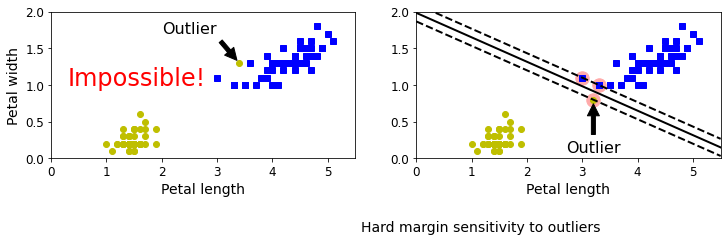

In [ ]:
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:,0][yo1==1], Xo1[:,1][yo1==1], "bs")
plt.plot(Xo1[:,0][yo1==0], Xo1[:,1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier", xy=(X_outliers[0][0],X_outliers[0][1]),
             xytext=(2.5,1.7),ha="center",
             arrowprops=dict(facecolor='black',shrink=0.1),
             fontsize=16)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:,0][yo2==1], Xo2[:,1][yo2==1], "bs")
plt.plot(Xo2[:,0][yo2==0], Xo2[:,1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0,5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier", xy=(X_outliers[1][0],X_outliers[1][1]),
             xytext=(3.2,0.08),ha="center",
             arrowprops=dict(facecolor='black',shrink=0.1),
             fontsize=16)
plt.axis([0, 5.5, 0, 2])
plt.text(-1,-1,"Hard margin sensitivity to outliers", fontsize=14)
plt.show()

Above shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin; on the right, the decision boundary ends up very different from the one we saw earlier,without the outlier, and it will probably not generalize as well.


#### Large margin vs margin violations


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)] # petal length, petal width
y = (iris['target']==2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([("scaler",StandardScaler()),
                    ("linear_svc",LinearSVC(C=1,loss="hinge", random_state=42))
                    ])
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
 svm_clf.predict([[5.5,1.7]])

array([1.])

In [ ]:
## Now let's generate the graph comparing different regularization settings:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1,loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100,loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([("scaler",scaler),
                            ("linear_svc",svm_clf1)])

scaled_svm_clf2 = Pipeline([("scaler",scaler),
                            ("linear_svc",svm_clf2)])

scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
## convert to unscaled parameter
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y*2 -1 
support_vectors_idx1 = (t* (X.dot(w1) + b1 ) <1).ravel()
support_vectors_idx2 = (t* (X.dot(w2) + b2 ) <1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 6.0, 0.8, 2.8)

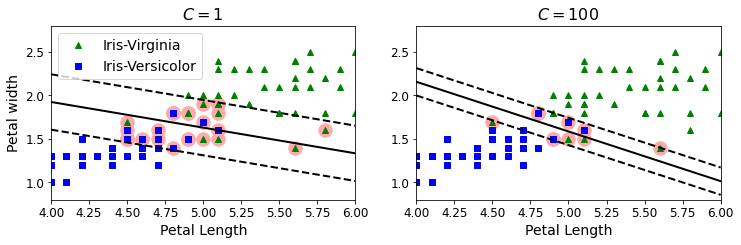

In [ ]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:,0][y==1], X[:,1][y==1], "g^", label="Iris-Virginia")
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C= {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4,6,0.8,2.8])

plt.subplot(122)
plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal Length", fontsize=14)
plt.title("$C= {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])



When creating an SVM model using Scikit-Learn, we can specify a number of hyperparameters. is one of those hyperparameters. 
- If we set it to a low value, then we end up with the model on the left
- If we set it to a high value, we get the model on the right.<br><br>
<font color='green'>
Margin violations are bad. It’s usually better to have few of them. However, in this case the model on the left has a lot of margin violations but will probably generalize better.</font>


**If  SVM model is overfitting, we can try regularizing it by reducing .**

#### Nonlinear SVM Classification

Sometimes many datasets are not even close to being linearly separable.<br>
One approach to handling nonlinear datasets is to add more features, such as polynomial features

In [ ]:
X1D = np.linspace(-4,4,9).reshape(-1,1) # take 9 data points from -4 to 4 
X2D = np.c_[X1D, X1D**2]
y= np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
X1D , X2D ,y

(array([[-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.]]), array([[-4., 16.],
        [-3.,  9.],
        [-2.,  4.],
        [-1.,  1.],
        [ 0.,  0.],
        [ 1.,  1.],
        [ 2.,  4.],
        [ 3.,  9.],
        [ 4., 16.]]), array([0, 0, 1, 1, 1, 1, 1, 0, 0]))

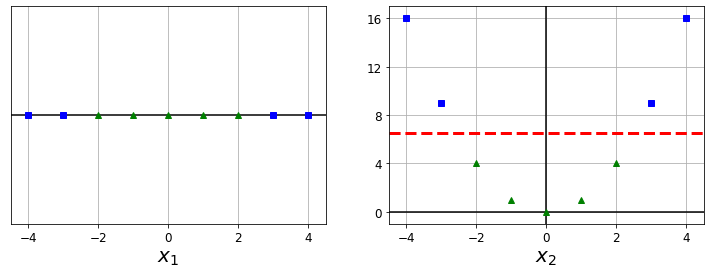

In [ ]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:,0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:,0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which="both")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color="k")
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.xlabel(r"$x_2$", fontsize=20)
plt.gca().get_yaxis().set_ticks([0,4,8,12,16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()


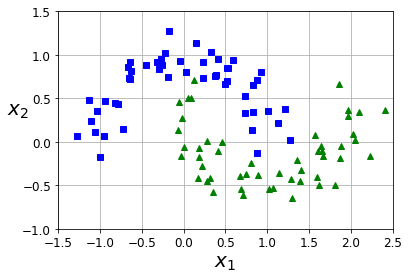

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X,y,axes):
  plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
  plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
                               ("poly_features",PolynomialFeatures(degree=3)),
                               ("scaler",StandardScaler()),
                               ("svm_clf", LinearSVC(C=10,loss="hinge", random_state=42))
])
polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

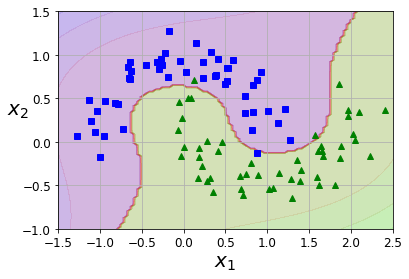

In [ ]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0,x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0,x1, y_pred, cmap= plt.cm.brg, alpha=0.2)
  plt.contourf(x0,x1,y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

#### Polynomial Kernel

- Adding polynomial features is simple to implement and can work great with all sorts of ML algo.
- Hence at low polynomial degree ,this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow 
- However,when using SVMs we can apply a mathematical technique called the **kernel trick**
- The kernel trick makes it possible to get the same result as if we   added many polynomial features, even with very high-degree polynomials, without actually having to add them,
- So there is no combinatorial explosion of the number of features because we don’t actually add any features. This trick is implemented by the **SVC** class. 

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
                                 ("scaler",StandardScaler()),
                                 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

poly_kernel_svm_clf code trains an SVM classifier using a third-degree polynomial kernel <br><br>
poly100_kernel_svm_clf trains  SVM classifier using a 10th-degree polynomial kernel <br><br>
if the model is overfitting, we might want to reduce the polynomial degree and if it is underfitting, we can try increasing it <br><br>
<font color='green'>The coef0 hyperparameter controls how much the model is influenced by high-degree polynomials versus low-degree polynomials. </font>




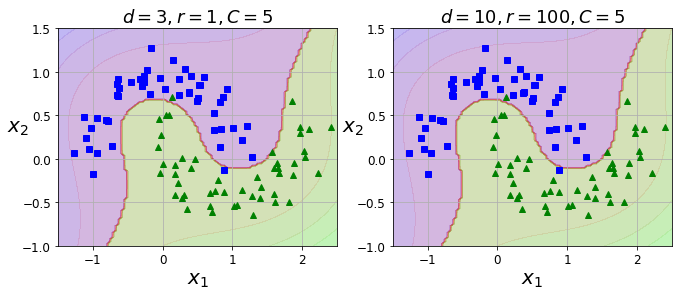

In [ ]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

**Understanding what C does**

- The parameter C gives the control of how the SVM will handle errors
- Rules of thumb:<br>
• A small C will give a wider margin,at the cost of some misclasifications.<br>
• A huge C will give the hard margin clasifier and tolerates zero constraint violation. <br>
• The key is to find the value of such that noisy data doesnot impact the solution too much.

**How to find the best C?**

Recommended approach to select C is to use gridSearch with CrossValidation.

#### Similarity Features

- Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures how much each instance resembles a particular landmark. 
- For example, let’s take the 1D dataset discussed above and add two landmarks to it at x1 = –2 and x1 = 1 ( left plot in below figure) 
- Next, **let’s define the similarity function to be the Gaussian Radial Basis Function (RBF) with γ = 0.3**

Gaussian RBF Formula 

 image.png

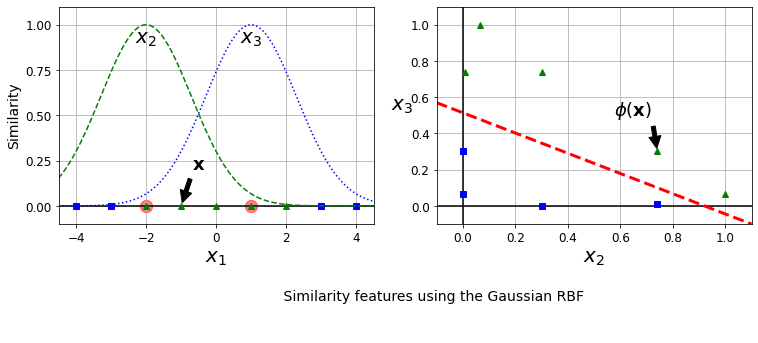

In [ ]:
def gaussian_rbf(x, landmark, gamma):
  return np.exp(-gamma * np.linalg.norm(x - landmark,axis=1)**2)

gamma =0.3

x1s = np.linspace(-4.5, 4.5,200).reshape(-1,1)
x2s = gaussian_rbf(x1s,-2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D,-2,gamma), gaussian_rbf(X1D,1,gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True,which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2,1], y=[0,0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:,0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:,0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy= (X1D[3,0],0),
             xytext = (-0.5, 0.2),
             ha="center",
             arrowprops = dict(facecolor='black',shrink=0.1),
             fontsize=18
             )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.text(-0.7,-0.7,"\n Similarity features using the Gaussian RBF\n\n", fontsize=14)
plt.show()

- Gaussian RBF is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).
- Then we can compute new Features, For example, lat the instance x1 = –1: it is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore its new features are x2 = exp(–0.3 × 12) ≈ 0.74 and x3 = exp(– 0.3 × 22) ≈ 0.30.
- The plot on the right in shows the transformed dataset (dropping the original features). As we can see, it is now linearly separable.

**How to select the landmarks**
- The simplest approach is to create a landmark at the location of each and every instance in the dataset.
- Doing that creates many dimensions and thus increases the chances that the transformed training set will be linearly separable.
- The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features.
- If  training set is very large, we end up with an equally large number of features.



In [ ]:
x1_example = X1D[3,0]
for landmark in (-2,1):
  k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
  print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


<font color='green'>Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets </font> <br>
**Hence, kernel trick does its SVM magic**,making it possible to obtain a similar result as if we  added many similarity features. 


Let’s try the class with the Gaussian RBF kernel:


In [ ]:
rbf_kernel_svm_clf = Pipeline([
                               ('scaler',StandardScaler()),
                               ('svm_clf',SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

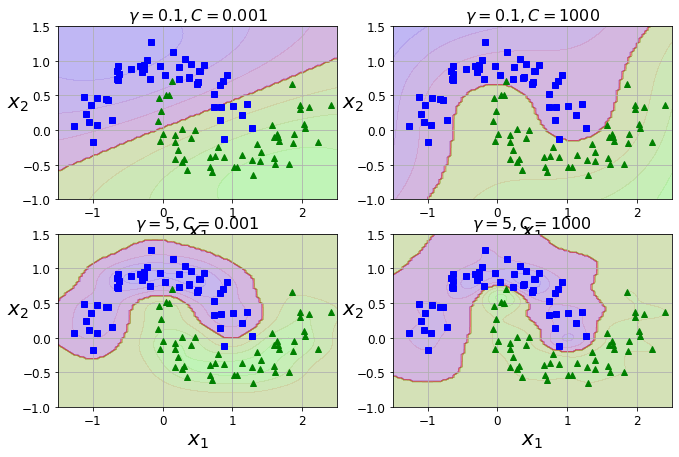

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 =0.1, 5
C1,C2 = 0.001, 1000

hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs=[]
for gamma ,C in hyperparams:
  rbf_kernel_svm_clf = Pipeline([
                               ('scaler',StandardScaler()),
                               ('svm_clf',SVC(kernel='rbf', gamma=gamma, C=C))
                              ])
  rbf_kernel_svm_clf.fit(X,y)
  svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

- All plots show models trained with different values of hyperparameters (γ) and C.
- Increasing gamma makes the bell-shaped curve narrower.
- As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances.
- Conversely, a small gamma value makes the bell- shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. 
- So γ acts like a regularization hyperparameter: if the model is overfitting, we should reduce it; if it is underfitting, we
 should increase it (similar to the hyperparameter).

 **Note** <br>
 - With so many kernels to choose from, how to decide which one to use? <br>
 - As a rule of thumb,  always try the linear kernel first (remember that LinearSVC is much faster than SVC(kernel="linear") ),especially if the training set is very large or if it has plenty of features. <br>
 - If the training set is not too large, always try the Gaussian RBF kernel; it works well in most cases.

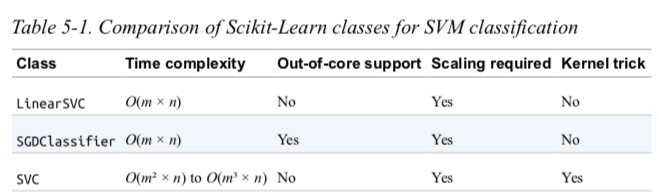

#### SVM Regression

- SVM algorithm is versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression
- To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, **SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).**
- The width of the street is controlled by a hyperparameter, ε
- Below shows two linear SVM Regression models trained on some random linear data, one with a large margin (ε = 1.5) and the other with a small margin (ε = 0.5).

In [ ]:
np.random.seed(42)
m =50
X = 2* np.random.rand(m,1)
y= (4 + 3*X + np.random.randn(m,1)).ravel()

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vectors(svm_reg,X,y):
  y_pred = svm_reg.predict(X)
  off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon )
  return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1,X,y)
svm_reg2.support_ = find_support_vectors(svm_reg2,X,y)

eps_x1 =1 
eps_y_pred = svm_reg1.predict([[ eps_x1 ]])


In [ ]:
eps_y_pred

array([6.52640746])

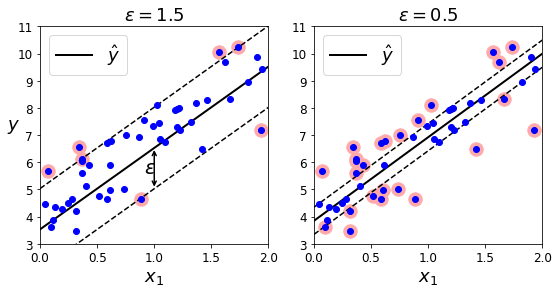

In [ ]:
def plot_svm_regression(svm_reg,X,y,axes):
  xls = np.linspace(axes[0], axes[1], 100).reshape(100,1)
  y_pred = svm_reg.predict(xls)
  plt.plot(xls, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
  plt.plot(xls, y_pred + svm_reg.epsilon, "k--")
  plt.plot(xls, y_pred - svm_reg.epsilon, "k--")
  plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
  plt.plot(X, y, "bo")
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.legend(loc="upper left", fontsize=18)
  plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

To tackle nonlinear regression tasks, we can use a kernelized SVM model. <br>
Below figure shows SVM Regression on a random quadratic training set, using a second-degree polynomial kernel. There is little regularization in the left plot (i.e., a large value), and much more regularization in the right plot (i.e., a small value).

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

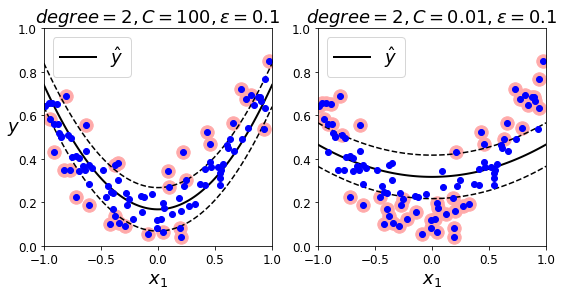

In [ ]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()